# Processing data

Read data already collected

In [91]:
import json
import time
import datetime
import pandas as pd
import numpy as np

tweets_data_morn = '/Users/Madhu/Documents/Courses/data_bds/bitcoin'
tweets_data_eve = '/Users/Madhu/Documents/Courses/data_bds/btctwitter2'

tweets_data_m = []
tweets_data_e = []

tweets_file = open(tweets_data_morn, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data_m.append(tweet)
    except:
        continue
        
tweets_file = open(tweets_data_eve, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data_e.append(tweet)
    except:
        continue


In [92]:
print (len(tweets_data_m))

8035


In [93]:
print (len(tweets_data_e))

2842


In [94]:
tweets_data_e[0]['created_at']

'Sat Oct 28 02:44:27 +0000 2017'

In [95]:
date_col = []
lang = []
text = []

for line in tweets_data_e:
    try:
        date_col.append(datetime.datetime.strptime(line['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
        lang.append(line['lang'])
        text.append(line['text'])
    except:
        continue

In [96]:
d = {'date': date_col, 'lang': lang, 'text':text}
df = pd.DataFrame(data=d)

In [183]:
df.tail()

,date,lang,text
2837,2017-10-28 03:15:04,en,Join now: \n\nhttps://t.co/UQaGl632VA\n$BTC $LTC $DOGE $VTC $PPC $FTC $RDD $NXT $DASH 56659279624
2838,2017-10-28 03:15:05,en,RT @Bitcoin_Mafia: All that glitters is not gold - ESPECIALLY #BitcoinGold https://t.co/a0ENLx2xJb @bitcoinist https://t.co/BD0jDu0EzS
2839,2017-10-28 03:15:05,en,HitBTC Exchange\nExchange bitflip.li \nhttps://t.co/oZdIBijDBN\n#bitcoin\n#HitBTC #BitFlip\n#ethereum #blockchain https://t.co/QXooSOsO8F
2840,2017-10-28 03:15:06,en,The US Shuts Down A Bitcoin Mining Operation https://t.co/YMjqChESuO https://t.co/P90Vb96o9l
2841,2017-10-28 03:15:06,en,The Latest #bitcoin News Today &amp; #cryptocurrency News - BitNewz #BTC\nhttps://t.co/TR0bRyLVff


In [98]:
df_en = df[df['lang']=='en']

In [107]:
pd.set_option('max_colwidth',150)
#df_en['text']
df_en.head()

,date,lang,text
1,2017-10-28 02:44:29,en,opened a bitcoin long here
2,2017-10-28 02:44:29,en,Bitcoin Gold Update! Amazon to Accept Bitcoin? Top Investor Criticizes Jamie Dimon! Check it out! https://t.co/XdY4kGVjkp #cryptocurrency …
3,2017-10-28 02:44:30,en,"First Bitcoin Gold, Now Bitcoin Silver Is Ready To Fork. Actual Fork Or Silly Joke? What Do You Think? Check it out! …"
4,2017-10-28 02:44:30,en,RT @Crypticsup: #cryptics #crowdsale #bitcoin #ico BTC/USD + ETH/USD and other coins forecast for 27.10.2017 – Cryptics Blog https://t.co/…
5,2017-10-28 02:44:31,en,Create Bitcoin account (online wallet) From and Deposit Instant Banking PayPal etchttps: https://t.co/du6Fj7NdLj 28.10 04:44


In [156]:
times = pd.DatetimeIndex(df_en['date'])
grouped = df_en.groupby([times.hour, times.minute])['text'].agg(['count'])

In [164]:
grouped.columns

Index(['count'], dtype='object')

In [21]:
df_en.to_csv('bitcoin_eng.csv') # this has all 4 bitcoins
#get data from the csv directly instead of running it till now

In [100]:
from pycorenlp import StanfordCoreNLP

In [101]:
nlp = StanfordCoreNLP('http://localhost:9000')

## Sample stanfordcoreNLP

In [24]:
res = nlp.annotate("I love you. I hate him. You are nice. He is dumb",
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
for s in res["sentences"]:
    print ("%d: '%s': %s %s" % (s["index"]," ".join([t["word"] for t in s["tokens"]]),s["sentimentValue"], s["sentiment"]))

0: 'I love you .': 3 Positive
1: 'I hate him .': 1 Negative
2: 'You are nice .': 3 Positive
3: 'He is dumb': 1 Negative


In [102]:
#filtering the tweets
#df_en.head()

senti_val = []
senti = []

for line in df_en['text']:
    res = nlp.annotate(line,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
    senti_val.append(s["sentimentValue"])
    senti.append(s["sentiment"])
    

In [104]:
myset = set(senti)
print (myset)

{'Neutral'}


In [106]:
print (set(senti_val))

{'2'}


In [ ]:
times = pd.DatetimeIndex(data.datetime_col)
grouped = df.groupby([times.hour, times.minute])

## Price of BTC

In [51]:
bitcoin_price = pd.read_csv('/Users/Madhu/Documents/Courses/data_bds/price_BTC_oct28.csv')

In [68]:
bitcoin_price.head()

,Date,Open,High,Low,Close
0,2017-10-26 00:00:00,5733.90,5734.67,5725.45,5723.00
1,2017-10-26 00:15:00,5723.00,5727.26,5712.41,5716.60
2,2017-10-26 00:30:00,5716.60,5719.82,5704.12,5708.61
3,2017-10-26 00:45:00,5708.61,5736.81,5708.61,5734.48
4,2017-10-26 01:00:00,5734.48,5736.24,5728.61,5736.31


In [74]:
datetime.datetime.strptime(bitcoin_price.iloc[0]['Date'],'%Y-%m-%d %H:%M:%S')

datetime.datetime(2017, 10, 26, 0, 0)

In [87]:
price_date_col = []
vals = []

for i in range(len(bitcoin_price)):
    try:
        price_date_col.append(datetime.datetime.strptime(bitcoin_price.iloc[i]['Date'],'%Y-%m-%d %H:%M:%S'))
        vals.append(bitcoin_price.iloc[i]['Close'])
    except:
        continue


In [179]:
price_data = {'date': price_date_col, 'value': vals}
price_df = pd.DataFrame(data=price_data)

In [186]:
#price_df = price_df[

price_df['date']>datetime.datetime(2017, 10, 27, 0, 0)


107    True
108    True
109    True
202    True
Name: date, dtype: bool

/Users/Madhu/Downloads/softwares/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


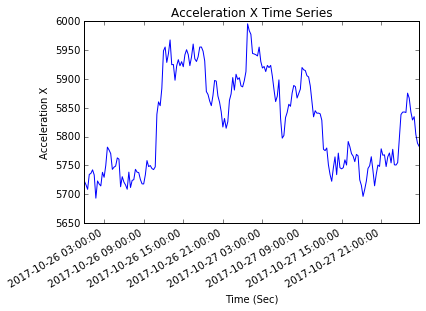

In [185]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

%matplotlib inline

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.plot(price_date_col, vals,'b')
plt.gcf().autofmt_xdate()
plt.title('Acceleration X Time Series')
plt.xlabel('Time (Sec)')
plt.ylabel('Acceleration X')
plt.legend()

#bitcoin_price_.plot()

Sample of grouping using date and count

In [180]:
price_df['date_tuple'] = price_df['date'].map(lambda x : (x.hour, x.minute))

In [181]:
price_df = price_df[price_df['date_tuple']>(2,30)]
price_df = price_df[price_df['date_tuple']<(3,30)]

In [150]:
price_df.drop(['date'], axis = 1, inplace = True)

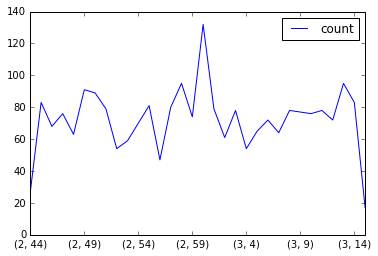

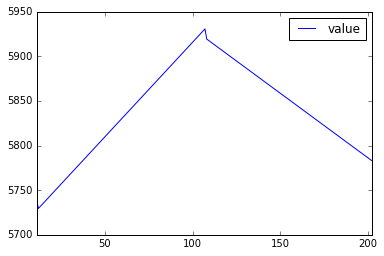

In [176]:
times = pd.DatetimeIndex(df_en['date'])
grouped = df_en['text'].groupby([times.hour, times.minute]).agg(['count'])
grouped.plot()
#df_en.groupby(['date_tuple']).size().reset_index(name='counts')

price_df.plot()

In [177]:
plt.plot(price_df[],)

,value,date_tuple
11,5738.14,"(2, 45)"
12,5729.53,"(3, 0)"
107,5930.61,"(2, 45)"
108,5919.23,"(3, 0)"
202,5783.28,"(2, 45)"


In [182]:
price_df

,date,value,date_tuple
11,2017-10-26 02:45:00,5738.14,"(2, 45)"
12,2017-10-26 03:00:00,5729.53,"(3, 0)"
13,2017-10-26 03:15:00,5749.87,"(3, 15)"
107,2017-10-27 02:45:00,5930.61,"(2, 45)"
108,2017-10-27 03:00:00,5919.23,"(3, 0)"
109,2017-10-27 03:15:00,5921.86,"(3, 15)"
202,2017-10-28 02:45:00,5783.28,"(2, 45)"
